In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing Dataset
Air=pd.read_excel("/content/Airlines+Data.xlsx")

In [3]:
Air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
Air.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [5]:
Air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
Air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
Air.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [8]:
Air.shape

(96, 2)

In [9]:
Air.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [10]:
Air.set_index('Month', inplace=True)
Air.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


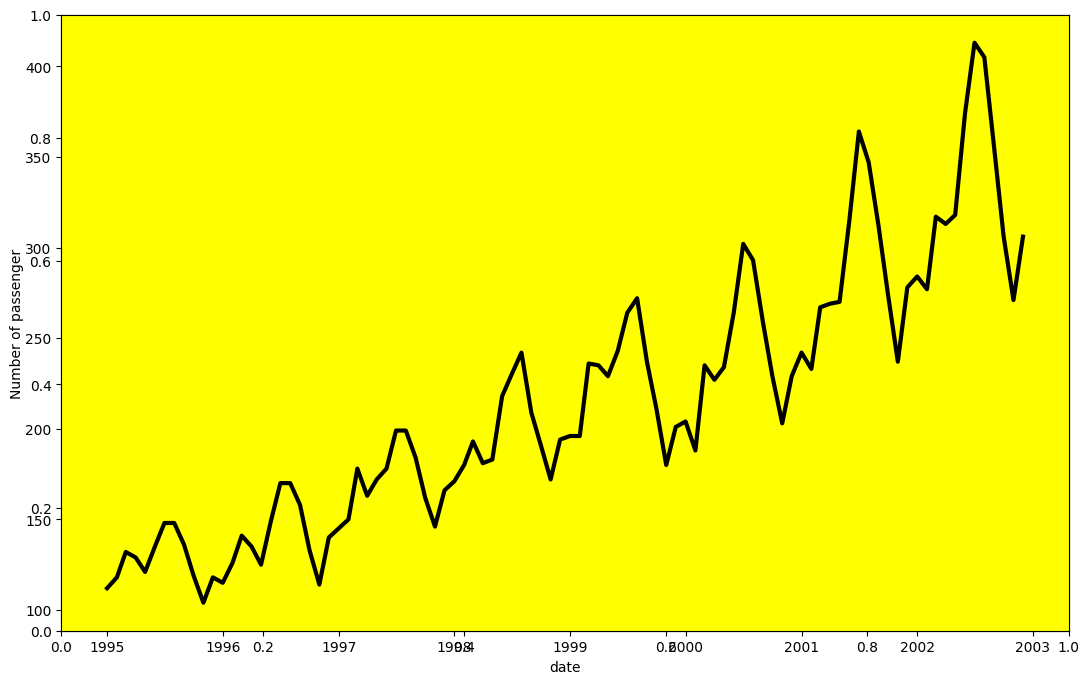

In [11]:
plt.figure(figsize=(13,8))
plt.xlabel("date")
plt.ylabel("Number of passenger")
ax = plt.axes()
ax.set_facecolor("yellow")
plt.plot(Air['Passengers'], color = 'black', linewidth=3)

**This line plot represents monthly passengers traffic from year 1995 to 2003.It also shows increase in passengers traffic over time.**


**As the line is not a straight, there are peaks and valleys which indicates that some factors that are affecting passengers traffic.**

**The peaks represent the highest values of data being plotted & the valleys represent the lowest values.**

<Axes: >

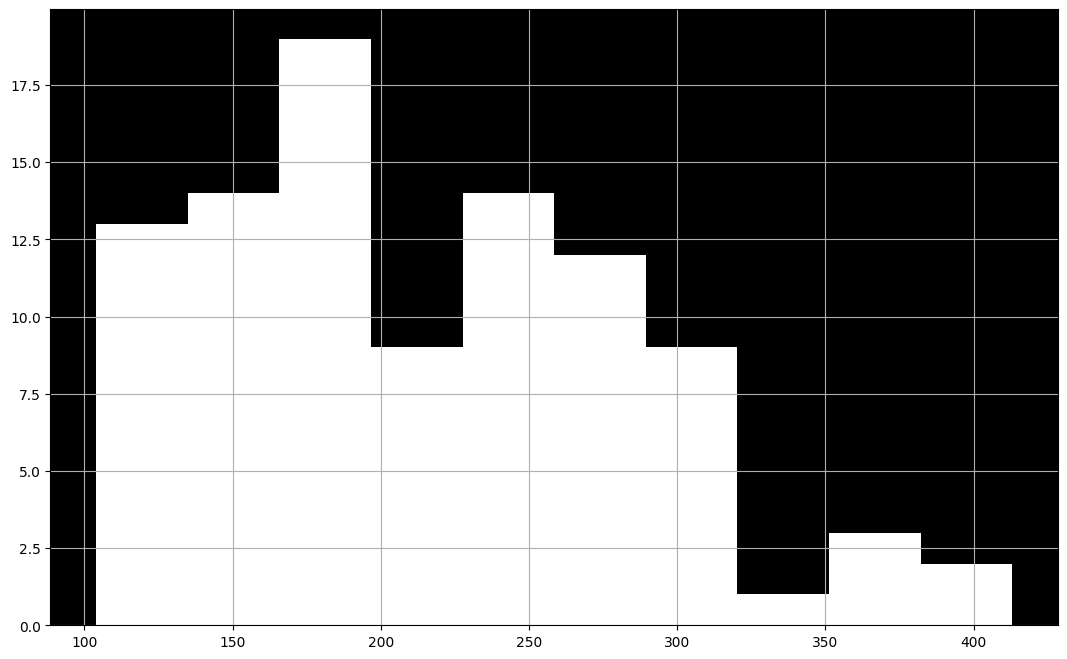

In [12]:
ax = plt.axes()
ax.set_facecolor("black")
Air['Passengers'].hist(figsize=(13,8), color = 'white')

**Insights:**
 
**Among the data set we are getting maximum of the traffic in 170 to 200 range & very less traffic in 320 to 350 range**

<Axes: ylabel='Density'>

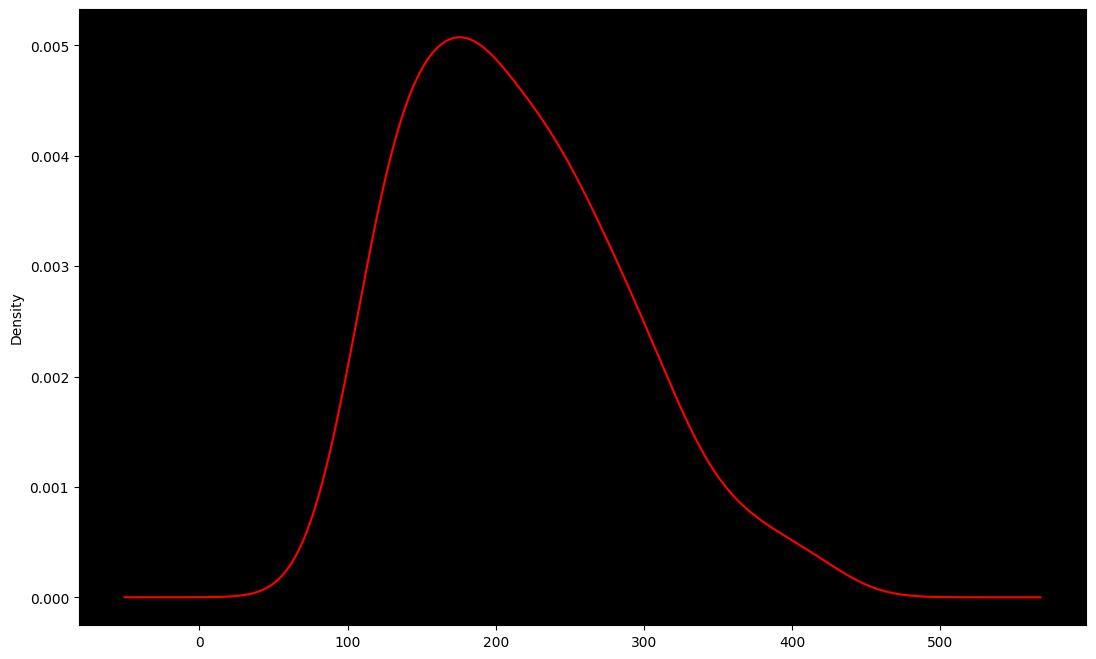

In [13]:
ax=plt.axes()
ax.set_facecolor("black")
Air['Passengers'].plot(kind = 'kde', figsize=(13,8), color = 'red')

**Here also the density plot shows highest peak for the spassengers traffic ranging between 150 to 250.**

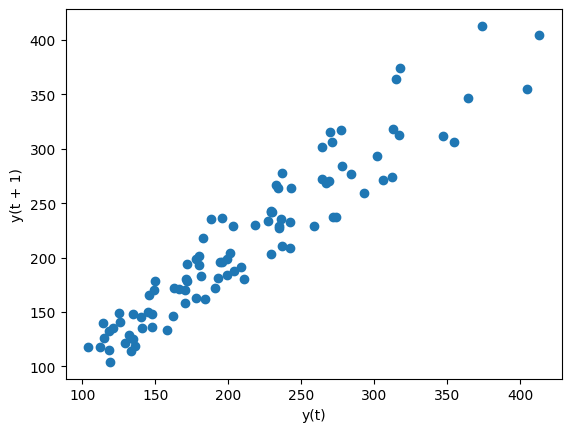

In [14]:
from pandas.plotting import lag_plot
ax = plt.axes()
lag_plot(Air['Passengers'])
ax.set_facecolor("white")
plt.show()

**This lag plot shows a scattered pattern of data points that are moderately positively correlated,there is a strong linear relationship between passengers traffic at time t and t+1**

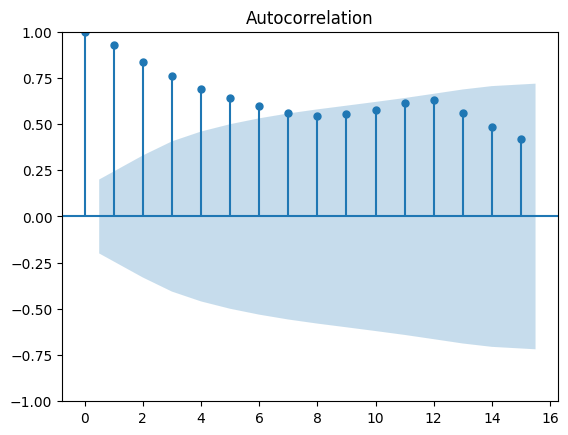

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Air.Passengers,lags=15)
plt.show()

**Function Used: ACF(Auto-Correlation Function)**

**here the height of the bars represents the correlation between the time series and its lagged values(sales). As all the bars appeared into the positive side there exist a positive correlation.**



**As the first bar in the plot is positive and relatively high  means there is a positive correlation between the time series and its lagged values at a lag of 1.**

**Where the blue shaded area shows the confidence interval, some of the bars extended beyond the confidence interval there can be a significant correlation which is unlikely to occur.**

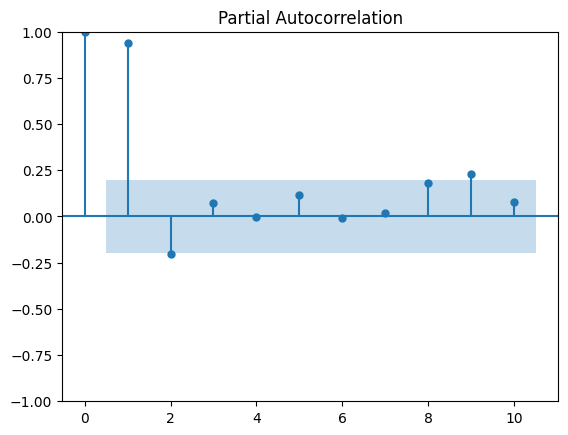

In [16]:
tsa_plots.plot_pacf(Air.Passengers,lags=10)
plt.show()

**Function Used:PACF(Partial-Correlation Function)**

**Now if we observe not all the bars appeared into the positive side one or two of the bars appeared into the negative side there exist a positive as well as negative correlation.**



**But the first bar in the plot is positive and relatively high  means there is a positive correlation between the time series and its lagged values at a lag of 1.**

<Axes: xlabel='Month', ylabel='Passengers'>

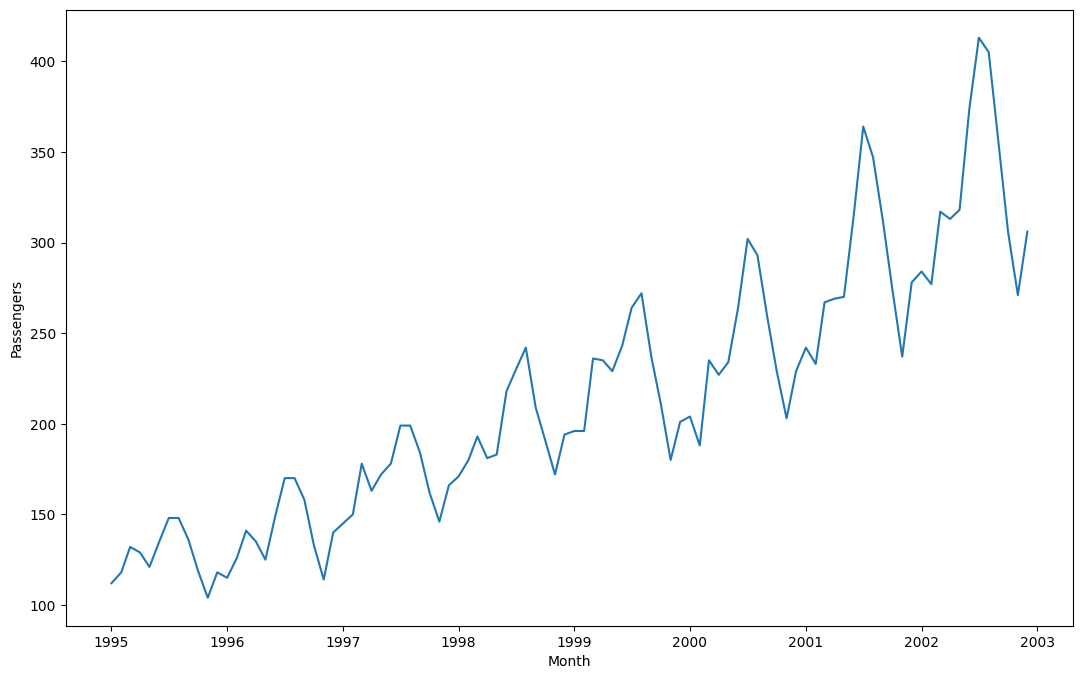

In [17]:
plt.figure(figsize=(13,8))
sns.lineplot(x="Month",y="Passengers",data=Air)

**This line plot shows year-over-year steady rise in passengers traffic over time.**

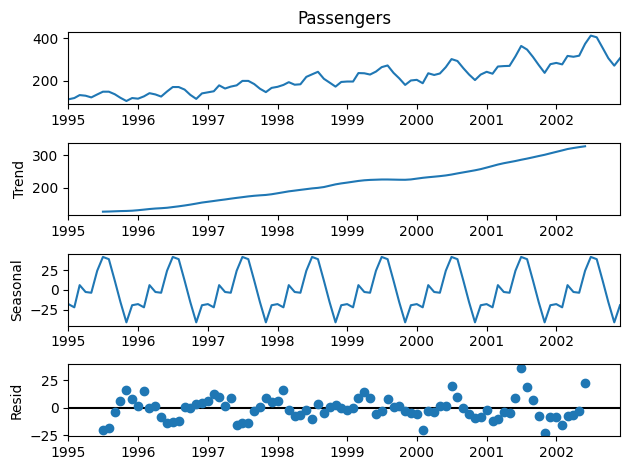

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(Air.Passengers,period=12)
decompose.plot()
plt.show()

**Here will analyze the decomposed components and write insights about the trend, seasonality, and residuals of the time series:**

**Trend:Here we can observe that there is a consistent  upward trend in the passengers traffic, which means airline passengers traffic appears to be increasing over time suggesting a long-term growth in passengers traffic.**

**Seasonality: Here we can observe there is a same pattern in the passengers traffic which repeats for each year indicating that there is a seasonal effect on the passengers traffic which could be due to factors such as  higher passenger traffic during summer months and lower traffic during winter months.It shows a clear seasonal pattern in the data.**

**Residuals:Here we can obsereve random fluctuations in the passengers traffic. By seeing residuals, we can not identify any clear pattern(datapoints are deviated from expected pattern which we have seen in above two plots) here the factors could be outliers, measurement errors etc.**

## Forecasting models building

**Now we are going to get different RMSE scores using different models, this score gives average difference between the predicted traffic values and the actual traffic values in test data.**

**We will compare RMSE value that we will obtained from different models & then will pick the one which has lower value among all.**

In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
Train = Air[0:76]
Test = Air[76:]

In [21]:
print("Length of train data is:",len(Train))
print("Length of test data is:",len(Test))

Length of train data is: 76
Length of test data is: 20


In [22]:
Train.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [23]:
Test.head()

,Passengers
Month,
2001-05-01,270
2001-06-01,315
2001-07-01,364
2001-08-01,347
2001-09-01,312


## Methods for Forecasting

**Simple Moving Average**

In [24]:
Air_ma=Air.copy()

In [25]:
Train_len=76

In [26]:
Air_ma['ma_forecast'] = Air_ma['Passengers'].rolling(12).mean()

In [27]:
Air_ma['ma_forecast'][Train_len:] = Air_ma['ma_forecast'][Train_len-1]

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
## Calculating RMSE and MAPE
rmse_ma = mean_squared_error(Test['Passengers'],Air_ma['ma_forecast'][Train_len:],squared=False).round(2)
rmse_ma

79.31

**Simple Exponential Smoothing**

In [30]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [31]:
SES_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_SES = SES_model.predict(start = Test.index[0],end = Test.index[-1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [32]:
rmse_SES = mean_squared_error(Test['Passengers'],pred_SES,squared=False).round(2)
rmse_SES

82.12

**Holt's Method**

In [33]:
from statsmodels.tsa.holtwinters import Holt

In [34]:
holt_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = Test.index[0],end = Test.index[-1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
rmse_holt = mean_squared_error(Test['Passengers'],pred_holt,squared=False).round(2)
rmse_holt

47.99

**Holt's Exponential Smoothing**

**Additive method**


In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [37]:
hes_add_add = ExponentialSmoothing(Train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hes_add_add = hes_add_add.predict(start = Test.index[0],end = Test.index[-1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
rmse_hes_add_add = mean_squared_error(Test['Passengers'],pred_hes_add_add,squared=False).round(2)
rmse_hes_add_add

37.73

**Multiplicative method**

In [39]:
hes_mul_add = ExponentialSmoothing(Train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hes_mul_add = hes_mul_add.predict(start = Test.index[0],end = Test.index[-1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
rmse_hes_mul_add = mean_squared_error(Test['Passengers'],pred_hes_mul_add,squared=False).round(2)
rmse_hes_mul_add

33.88

In [41]:
Air1 = Air.copy()
Air1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [42]:
Air1["t"] = np.arange(1,97)
Air1["t_squared"] = Air1["t"]*Air1["t"]
Air1["log_passengers"] = np.log(Air1["Passengers"])
Air1.head()

,Passengers,t,t_squared,log_passengers
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791


In [43]:
Train1 = Air1.head(76)
Test1 = Air1.tail(20)

**Linear Model**

In [44]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [45]:
import statsmodels.formula.api as smf 
lm = smf.ols('Passengers~t',data=Train1).fit()
pred_l =  pd.Series(lm.predict(pd.DataFrame(Test1['t'])))
rmse_lm = RMSE(Test1['Passengers'], pred_l)
rmse_lm

57.000147882565884

**Exponential Model**

In [46]:
Exp = smf.ols('log_passengers~t',data=Train1).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test1['t'])))
rmse_Expm = RMSE(Test1['Passengers'], np.exp(pred_Exp))
rmse_Expm

46.62154394719378

**Quadratic Model**

In [47]:
quad = smf.ols('Passengers~t+t_squared',data=Train1).fit()
pred_quad = pd.Series(quad.predict(Test1[["t","t_squared"]]))
rmse_quadm = RMSE(Test1['Passengers'], pred_quad)
rmse_quadm

58.494274639475286

**Auto Regressive (AR) model**

**For this model, non stationary time series needs to be converted to stationary time series. ARIMA model automatically perfrorms differencing to convert non-stationary series to stationary series.**

**ARIMA model**

In [48]:
import statsmodels.formula.api as smf


In [49]:
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(Train['Passengers'], order=(1,1,1)).fit()
pred_arima= arima.predict(start = Test.index[0],end = Test.index[-1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
rmse_arima = mean_squared_error(Test['Passengers'],pred_arima,squared=False).round(2)
rmse_arima

68.72

## Choosing the best model

In [51]:
models=['simple_moving_average','simple_expo_smoothing','Holt','Holt_additive','Holt_multiplicative','linear_model','exponential_model','quadratic_model','ARIMA']
rmse=[rmse_ma,rmse_SES,rmse_holt,rmse_hes_add_add,rmse_hes_mul_add,rmse_lm,rmse_Expm,rmse_quadm,rmse_arima]
d={'Models':models,'Rmse':rmse}
Air_model=pd.DataFrame(d)
Air_model

,Models,Rmse
0,simple_moving_average,79.310000
1,simple_expo_smoothing,82.120000
2,Holt,47.990000
3,Holt_additive,37.730000
4,Holt_multiplicative,33.880000
5,linear_model,57.000148
6,exponential_model,46.621544
7,quadratic_model,58.494275
8,ARIMA,68.720000


In [52]:
Air_model.sort_values(by='Rmse')

,Models,Rmse
4,Holt_multiplicative,33.880000
3,Holt_additive,37.730000
6,exponential_model,46.621544
2,Holt,47.990000
5,linear_model,57.000148
7,quadratic_model,58.494275
8,ARIMA,68.720000
0,simple_moving_average,79.310000
1,simple_expo_smoothing,82.120000


**In order to get a better sense of how well our model is performing, we are comparing the RMSE scores that we've obtained using different models**.

**Lower values of RMSE indicates that our model is good at predicting values when compared with the actual ones.**

**So Holt's exponential smoothing with multiplicative seasonality and additive trend is the best model as it has the lowest rmse.**